In [69]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
%autoreload 2

In [65]:
import os
import sys
sys.path.append('../..')
sys.path.append('../../morty')

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

from morty.training import plot_training_history

## Data Preparation

In [16]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Architecture

In [17]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [18]:
batch_size = 128
epochs = 15

training_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 15s 35ms/step - loss: 0.7592 - accuracy: 0.7718 - val_loss: 0.0863 - val_accuracy: 0.9758
Epoch 2/15
422/422 [==============================] - 14s 33ms/step - loss: 0.1182 - accuracy: 0.9636 - val_loss: 0.0561 - val_accuracy: 0.9838
Epoch 3/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0810 - accuracy: 0.9756 - val_loss: 0.0502 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0751 - accuracy: 0.9772 - val_loss: 0.0441 - val_accuracy: 0.9868
Epoch 5/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0377 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0405 - val_accuracy: 0.9897
Epoch 7/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0522 - accuracy: 0.9837 - val_loss: 0.0407 - val_accuracy:

## Evaluation

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025763824582099915
Test accuracy: 0.9918000102043152


               Train  Validation  Best Epoch 

      loss    0.0332    0.0287        14
  accuracy    0.9892    0.9925        14



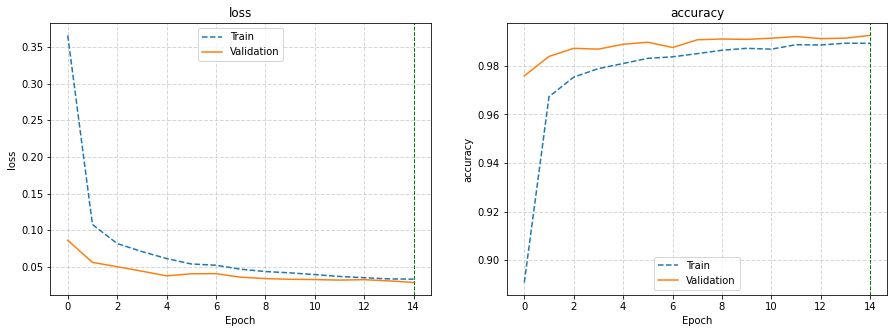

In [86]:
print(plot_training_history(training_history))